In [3]:
import random

In [4]:
def generate_random_str(length):
    res = ''
    for i in range(length):
        res += chr(random.randint(41, 126))
    
    return res

In [5]:
def square_error(x, y):
    err = 0
    for i in range(len(x)):
        err += (ord(y[i]) - ord(x[i])) ** 2
    
    return err

In [6]:
def mutate(x):
    i = random.randint(0, len(x) - 1)
    tmp = list(x)
    tmp[i] = chr(ord(tmp[i]) + random.randint(-1, 1))
    
    return ''.join(tmp)

In [7]:
def run(source, target):
    err = square_error(source, target)
    counter = 0
    while err:
        mstr = mutate(source)
        merr = square_error(mstr, target)
        if merr < err:
            err = merr
            source = mstr
            print(f'{counter} \t{err} \t{source}', end='\r', flush=True)
        counter += 1
    return source

In [ ]:
word = 'Hello, World!'
x = generate_random_str(len(word))
print(f'\r{second_s}')

In [ ]:
s = run(x, word)

In [ ]:
print(s)

# Hypothesis

In [8]:
# Converters
def to_narr(string):
    return [ord(x) for x in list(string)]

def to_str(narr):
    return ''.join([chr(x) for x in narr])

assert 'Hello, world!' == to_str(to_narr('Hello, world!'))

In [16]:
word = 'Hello, world!'
# Input
sample = to_narr(generate_random_str(len(word)))
# Target
target = to_narr(word)

In [18]:
def train(x, y):
    '''Get input and target. Return trained weights.'''
    n = len(x)
    # Initialize random weights
    w = [random.randint(1, 255) for x in range(n)]
    # Apply linear function
    z = [w[i] + x[i] for i in range(n)]
    # Find an error
    err = [z[i] - y[i] for i in range(n)]
    # Correct weigths
    w = [w[i] - err[i] for i in range(n)]
    return w

def apply(x, w):
    return [x[i] + w[i] for i in range(len(x))]

In [19]:
w = train(sample, target)
out = apply(sample, w)

print(f'weights:\t{w}\ninput:\t\t{x}\ntarget:\t\t{y}\noutput:\t\t{out}')

assert to_str(out) == 'Hello, world!'

weights:	[-6, 19, -7, 66, 21, -36, -75, 39, 16, 25, 6, 41, -66]
input:		[73, 74, 123, 54, 50, 80, 125, 67, 121, 110, 116, 71, 68]
target:		[72, 101, 108, 108, 111, 44, 32, 119, 111, 114, 108, 100, 33]
output:		[72, 101, 108, 108, 111, 44, 32, 119, 111, 114, 108, 100, 33]


In [20]:
to_str(apply(sample, train(sample, target)))

'Hello, world!'

In [27]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 12]

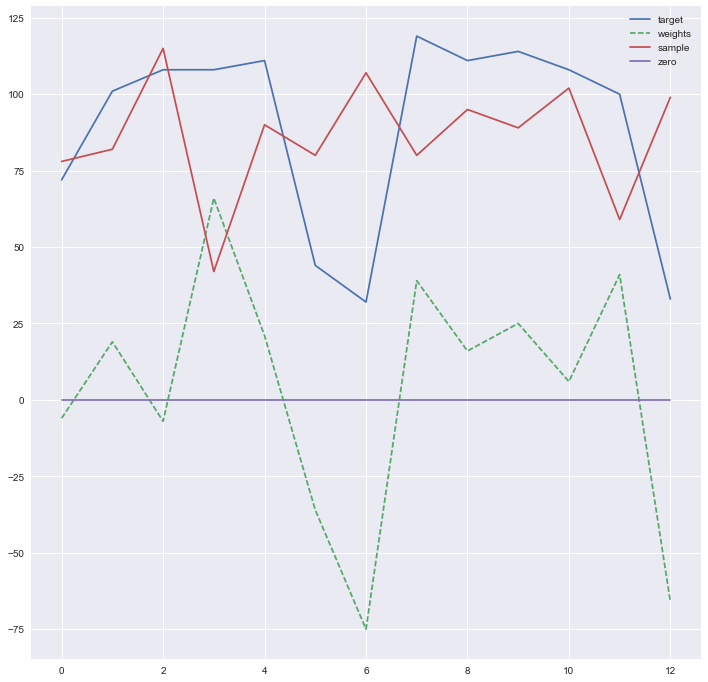

In [31]:
target_x = [x for x in range(len(word))]
target_y = to_narr(word)

weights_x = [x for x in range(len(w))]
weights_y = w

sample_x = [x for x in range(len(sample))]
sample_y = sample

zero_x = [x for x in range(len(sample))]
zero_y = [0 for x in range(len(sample))]

plt.plot(target_x, target_y)
plt.plot(weights_x, weights_y, linestyle='--')
plt.plot(sample_x, sample_y)
plt.plot(zero_x, zero_y)
plt.legend(['target', 'weights', 'sample', 'zero'])